In [73]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
sales_df = pd.read_csv("sales.csv")
sales_df = sales_df[sales_df['open'] == 1].copy()
print(sales_df)

        Unnamed: 0  store_ID  day_of_week        date  nb_customers_on_day  \
0           425390       366            4  2013-04-18                  517   
1           291687       394            6  2015-04-11                  694   
2           411278       807            4  2013-08-29                  970   
3           664714       802            2  2013-05-28                  473   
4           540835       726            4  2013-10-10                 1068   
...            ...       ...          ...         ...                  ...   
640833      122579        77            6  2015-01-17                  701   
640835      359783       409            6  2013-10-26                  483   
640836      152315        97            1  2014-04-14                  987   
640837      117952       987            1  2014-07-07                  925   
640838      435829      1084            4  2014-06-12                  725   

        open  promotion state_holiday  school_holiday  sales  


In [77]:
sales_df.describe()

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,532016.000000,532016.000000,532016.000000,532016.000000,532016.0,532016.000000,532016.000000,532016.000000
mean,355998.345674,558.050115,3.523479,762.960407,1.0,0.446520,0.193229,6959.251679
std,205568.449180,321.613167,1.723849,400.736508,0.0,0.497132,0.394832,3105.241710
min,0.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,178080.750000,280.000000,2.000000,519.000000,1.0,0.000000,0.000000,4861.000000
50%,355963.500000,558.000000,3.000000,676.000000,1.0,0.000000,0.000000,6372.000000
75%,533943.500000,836.000000,5.000000,893.000000,1.0,1.000000,0.000000,8365.000000
max,712044.000000,1115.000000,7.000000,5458.000000,1.0,1.000000,1.000000,41551.000000


In [78]:
viz = sales_df[['day_of_week','promotion','school_holiday']]
viz.hist()


array([[<Axes: title={'center': 'day_of_week'}>,
        <Axes: title={'center': 'promotion'}>],
       [<Axes: title={'center': 'school_holiday'}>, <Axes: >]],
      dtype=object)

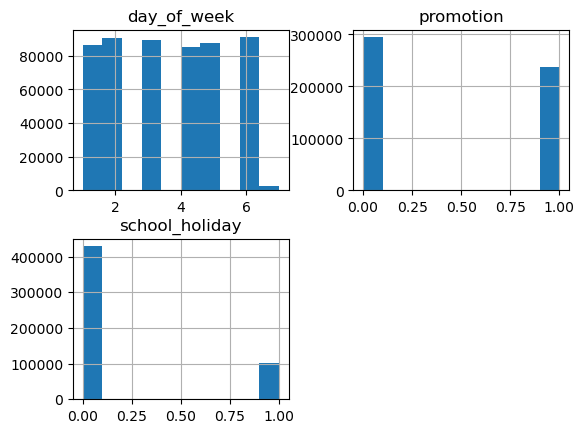

In [79]:
plt.scatter(sales_df.open, sales_df.sales,  color='blue')
plt.xlabel("open")
plt.ylabel("sales")
plt.show()

In [80]:
sales_df['date'] = pd.to_datetime(sales_df['date'])

# Extract additional time features
sales_df['year'] = sales_df['date'].dt.year
sales_df['month'] = sales_df['date'].dt.month
sales_df['day'] = sales_df['date'].dt.day



In [81]:
sales_df['is_state_holiday'] = (sales_df['state_holiday'] != '0').astype(int)

sales_df['is_holiday_a'] = (sales_df['state_holiday'] == 'a').astype(int)
sales_df['is_holiday_b'] = (sales_df['state_holiday'] == 'b').astype(int)
sales_df['is_holiday_c'] = (sales_df['state_holiday'] == 'c').astype(int)

sales_df['promo_no_holiday'] = ((sales_df['promotion'] == 1) & (sales_df['is_state_holiday'] == 0)).astype(int)
sales_df['promo_school_holiday'] = ((sales_df['promotion'] == 1) & (sales_df['school_holiday'] == 1)).astype(int)

features.extend(['is_state_holiday', 'is_holiday_a', 'is_holiday_b', 'is_holiday_c', 'promo_no_holiday', 'promo_school_holiday'])
print("Updated feature list:", features)

Updated feature list: ['store_ID', 'day_of_week', 'month', 'year', 'day', 'promotion', 'school_holiday', 'is_state_holiday', 'is_holiday_a', 'is_holiday_b', 'is_holiday_c', 'promo_no_holiday', 'promo_school_holiday', 'is_state_holiday', 'is_holiday_a', 'is_holiday_b', 'is_holiday_c', 'promo_no_holiday', 'promo_school_holiday']


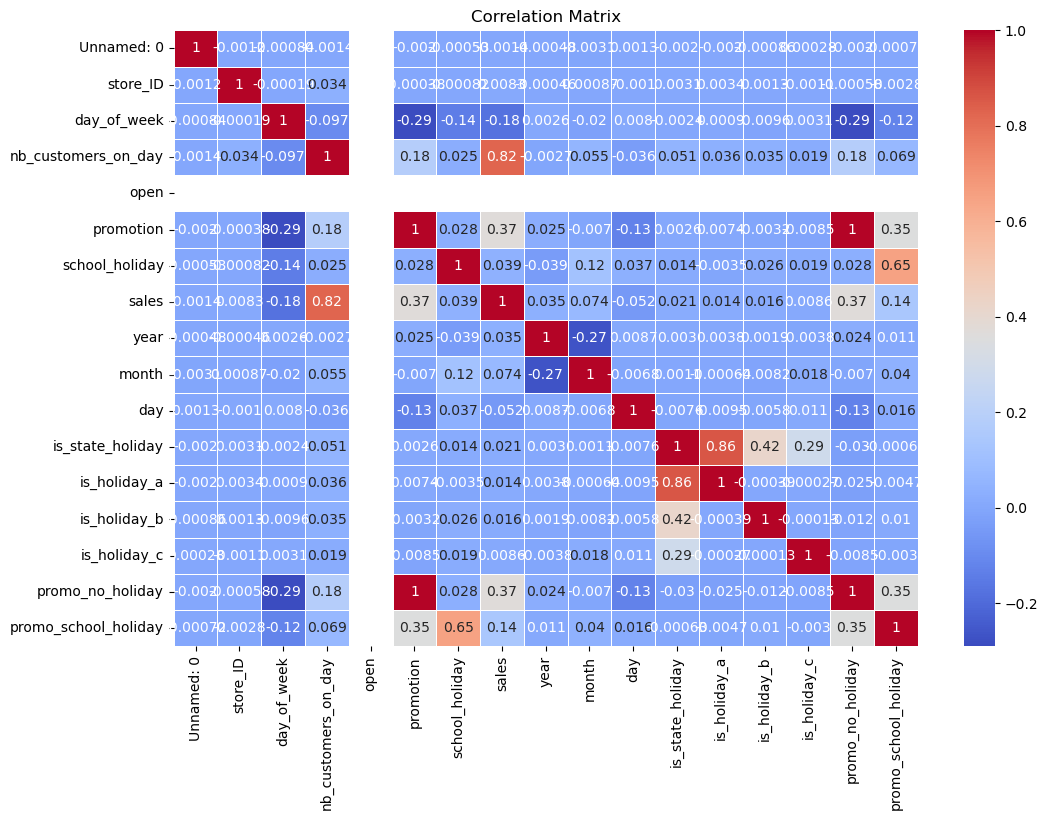

In [82]:
numerical_cols = sales_df.select_dtypes(include=[np.number]).columns
correlation_matrix = sales_df[numerical_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

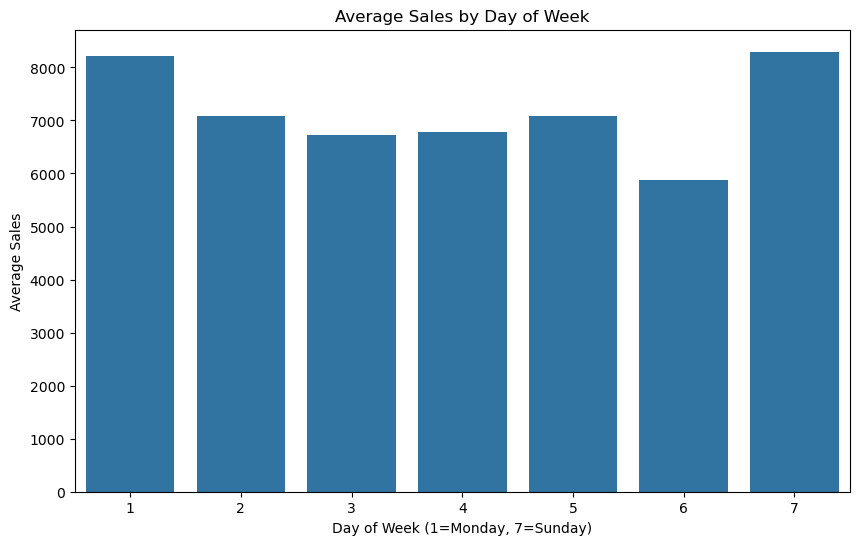

In [83]:
# Sales by day of week
plt.figure(figsize=(10, 6))
sales_by_day = sales_df.groupby('day_of_week')['sales'].mean().reset_index()
sns.barplot(x='day_of_week', y='sales', data=sales_by_day)
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week (1=Monday, 7=Sunday)')
plt.ylabel('Average Sales')
plt.show()

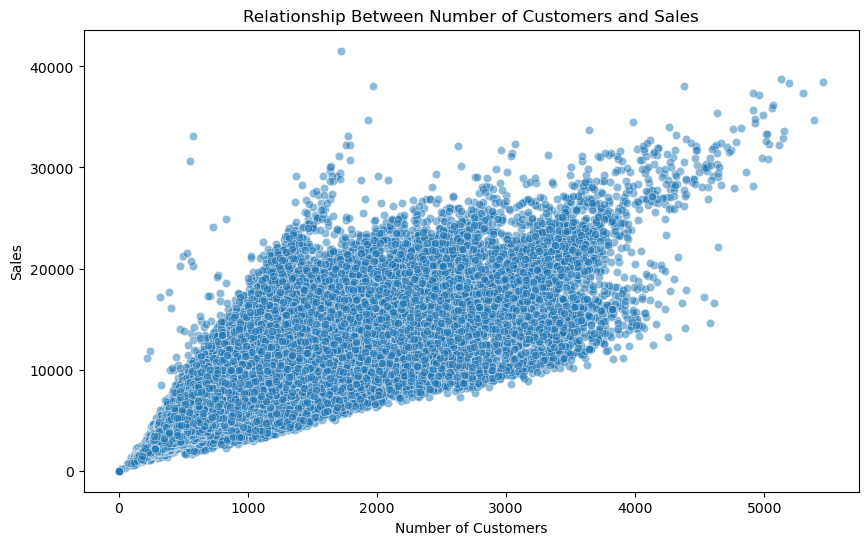

In [84]:
plt.figure(figsize=(10, 6))
open_stores = sales_df[sales_df['open'] == 1]
sns.scatterplot(x='nb_customers_on_day', y='sales', data=open_stores, alpha=0.5)
plt.title('Relationship Between Number of Customers and Sales')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

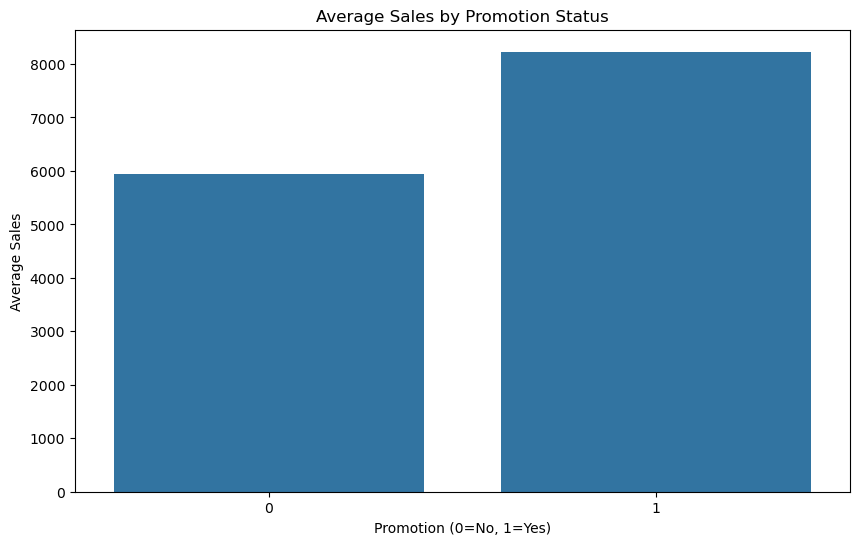

In [85]:
plt.figure(figsize=(10, 6))
sales_by_promo = sales_df.groupby('promotion')['sales'].mean().reset_index()
sns.barplot(x='promotion', y='sales', data=sales_by_promo)
plt.title('Average Sales by Promotion Status')
plt.xlabel('Promotion (0=No, 1=Yes)')
plt.ylabel('Average Sales')
plt.show()

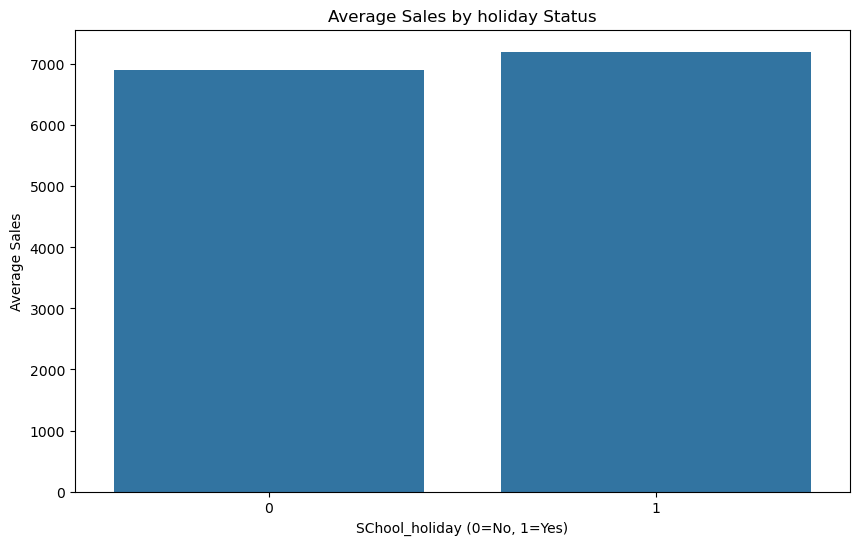

In [86]:
plt.figure(figsize=(10, 6))
sales_by_promo = sales_df.groupby("school_holiday")['sales'].mean().reset_index()
sns.barplot(x='school_holiday', y='sales', data=sales_by_promo)
plt.title('Average Sales by holiday Status')
plt.xlabel('SChool_holiday (0=No, 1=Yes)')
plt.ylabel('Average Sales')
plt.show()

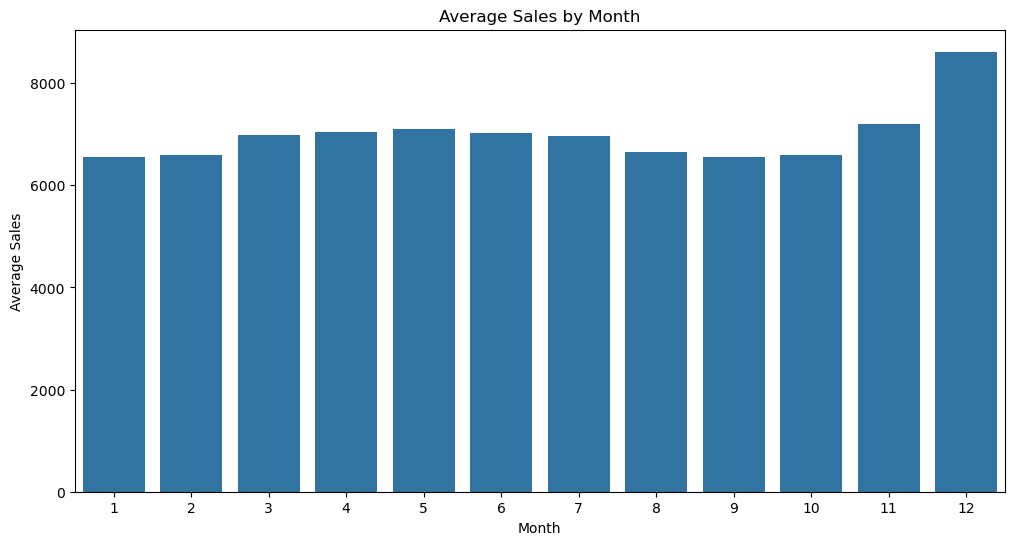

In [87]:
# Sales by month
plt.figure(figsize=(12, 6))
sales_by_month = sales_df.groupby('month')['sales'].mean().reset_index()
sns.barplot(x='month', y='sales', data=sales_by_month)
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

In [88]:
sales_df.describe

features = [
    'store_ID', 'day_of_week', 'month', 'year', 'day',
    'promotion', 'school_holiday', 'is_state_holiday',
    'is_holiday_a', 'is_holiday_b', 'is_holiday_c', 'promo_no_holiday', 'promo_school_holiday',
]
X=sales_df[features]
y=sales_df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
X_train.shape
X_test.shape
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 425612 samples
Testing set size: 106404 samples


In [90]:
from sklearn.linear_model import LinearRegression

In [93]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("rmse: ", rmse)
print("mae", mae)
print(f"R² Score: {r2:.4f}")

coefficients = pd.DataFrame({'Feature': features, 'Coefficient': regr.coef_})
coefficients = coefficients.sort_values('Coefficient', ascending=False)

print("Top 4 features")
print(coefficients.head(4))

print("Top 4")
print(coefficients.tail())


Coefficients:  [ 9.32989622e-02 -1.35685299e+02  8.10641816e+01  1.99854954e+02
 -2.88541193e+00  1.71607529e+03  5.34189940e+01  2.13210980e+03
 -9.05922120e+02  1.15220293e+03  1.88582899e+03  4.24487909e+02
  2.55132299e+01]
Intercept:  -396488.5749568138
rmse:  2854.9027665303993
mae 2068.266175322702
R² Score: 0.1521
Top 4 features
             Feature  Coefficient
7   is_state_holiday  2132.109801
10      is_holiday_c  1885.828994
5          promotion  1716.075288
9       is_holiday_b  1152.202927
Top 4
                 Feature  Coefficient
12  promo_school_holiday    25.513230
0               store_ID     0.093299
4                    day    -2.885412
1            day_of_week  -135.685299
8           is_holiday_a  -905.922120


TODO: what insights can we make here
- Promotion is the best driver for sales
- Day of week had a strong negative coefficient (Monday has the highest sales and gets less as the next days come)

In [95]:
cv_scores = cross_val_score(regr, X, y, cv=5, scoring='r2')
print("\nCross-validation R² scores:", cv_scores)
print(f"Mean CV R² score: {cv_scores.mean():.4f}")
print(f"Standard deviation of CV R² scores: {cv_scores.std():.4f}")


Cross-validation R² scores: [0.148704   0.14944105 0.14942589 0.15086294 0.14800506]
Mean CV R² score: 0.1493
Standard deviation of CV R² scores: 0.0009


In [97]:
from sklearn.preprocessing import PolynomialFeatures

# Add only interaction terms, no polynomial terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Get feature names for interpretability
feature_names = poly.get_feature_names_out(features)

# Train model with interactions
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
poly_r2 = lr_poly.score(X_test_poly, y_test)
print(f"With interaction features: R²={poly_r2:.4f}")

# Examine top interaction terms
coeffs = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_poly.coef_
}).sort_values('Coefficient', ascending=False)
print("Top 10 interactions:")
print(coeffs.head(10))

# Cross-validation for the model with interaction features
from sklearn.model_selection import cross_val_score
X_poly = poly.fit_transform(X)
# Assuming X_poly contains all your data with interaction features
cv_scores_poly = cross_val_score(LinearRegression(), X_poly, y, cv=5, scoring='r2')
print(f"Cross-validation R² scores with interactions: {cv_scores_poly}")
print(f"Mean CV R² score: {cv_scores_poly.mean():.4f}")
print(f"Standard deviation of CV scores: {cv_scores_poly.std():.4f}")

With interaction features: R²=0.1738
Top 10 interactions:
                                Feature   Coefficient
64           promotion is_state_holiday  1.090664e+06
65               promotion is_holiday_a  1.006052e+06
5                             promotion  6.811949e+05
32             day_of_week is_holiday_b  1.718829e+05
63             promotion school_holiday  9.574099e+04
75  school_holiday promo_school_holiday  9.574099e+04
69       promotion promo_school_holiday  9.574099e+04
12                 promo_school_holiday  9.574099e+04
66               promotion is_holiday_b  8.461165e+04
30         day_of_week is_state_holiday  5.778457e+04
Cross-validation R² scores with interactions: [0.17024706 0.17152296 0.17193838 0.17186664 0.16879905]
Mean CV R² score: 0.1709
Standard deviation of CV scores: 0.0012


Cross interactions (multiple feature models via polynomial) improved the R² by 14.5%